In [1]:
import json 
import os
import pandas as pd
from IPython.display import Video
import IPython.display as ipd
from utils import video as util_video
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = util_video.get_data('../data/v1_split_trailer.json')

In [3]:
split_types = ['train', 'test', 'val']
for split in split_types:
    data_train = data[split]
    count = 0
    labels = {'scale': {}, 'movement': {}}
    for id_movie, clips in data_train.items():
        for key, labels_clip in clips.items():
            filename = id_movie + '_' + key + '.mp4'
            # scale labels
            label_scale = labels_clip['scale']['label']
            if(label_scale in labels['scale']):
                labels['scale'][label_scale] += 1
            else:
                labels['scale'][label_scale] = 1

            # movements labels
            label_movement = labels_clip['movement']['label']
            if(label_movement in labels['movement']):
                labels['movement'][label_movement] += 1
            else:
                labels['movement'][label_movement] = 1            

            count += 1
    print(f"Shot in {split}", count)

    print(f"Scales labels in {split}")
    print(dict(sorted(labels['scale'].items())))

    print(f"Movement labels in {split}")
    print(dict(sorted(labels['movement'].items())))
    print("---------------------------------")


Shot in train 20856
Scales labels in train
{'CS': 4529, 'ECS': 3946, 'FS': 4275, 'LS': 3456, 'MS': 4650}
Movement labels in train
{'Motion': 6092, 'Multi_movement': 96, 'Pull': 201, 'Push': 619, 'Static': 13848}
---------------------------------
Shot in test 8187
Scales labels in test
{'CS': 1792, 'ECS': 1641, 'FS': 1642, 'LS': 1359, 'MS': 1753}
Movement labels in test
{'Motion': 2385, 'Multi_movement': 38, 'Pull': 80, 'Push': 220, 'Static': 5464}
---------------------------------
Shot in val 4610
Scales labels in val
{'CS': 1049, 'ECS': 922, 'FS': 886, 'LS': 747, 'MS': 1006}
Movement labels in val
{'Motion': 1294, 'Multi_movement': 26, 'Pull': 46, 'Push': 154, 'Static': 3090}
---------------------------------


In [14]:
train_df = pd.DataFrame(data=util_video.get_videos_with_labels(data, -1, with_frames = True),
        columns=['video', 'shot', 'scale', 'scale_value', 'movement', 'movement_value', 'ubication', 'lenght_frames','frames_per_second','duration'],
                )
test_df = pd.DataFrame(data=util_video.get_videos_with_labels(data, -1,split='test', with_frames = True),
        columns=['video', 'shot', 'scale', 'scale_value', 'movement', 'movement_value', 'ubication', 'lenght_frames','frames_per_second','duration'],
                )
val_df = pd.DataFrame(data=util_video.get_videos_with_labels(data, -1, split='val', with_frames = True),
        columns=['video', 'shot', 'scale', 'scale_value', 'movement', 'movement_value', 'ubication', 'lenght_frames','frames_per_second','duration'],
                )


20856it [07:30, 46.27it/s]
8187it [03:12, 42.49it/s]
4610it [01:49, 42.04it/s]


In [15]:
train_df

,video,shot,scale,scale_value,movement,movement_value,ubication,lenght_frames,frames_per_second,duration
0,tt4092686,0011,FS,3,Static,4,../data/data_cleaned/train/tt4092686_shot_0011...,172,24.000000,7.166667
1,tt2660294,0003,FS,3,Motion,0,../data/data_cleaned/train/tt2660294_shot_0003...,62,23.976024,2.585917
2,tt3034594,0038,ECS,0,Motion,0,../data/data_cleaned/train/tt3034594_shot_0038...,23,24.000000,0.958333
3,tt5725894,0024,ECS,0,Static,4,../data/data_cleaned/train/tt5725894_shot_0024...,38,29.970030,1.267933
4,tt2049448,0035,CS,1,Motion,0,../data/data_cleaned/train/tt2049448_shot_0035...,154,30.000000,5.133333
...,...,...,...,...,...,...,...,...,...,...
20851,tt3569782,0034,FS,3,Motion,0,../data/data_cleaned/train/tt3569782_shot_0034...,27,24.000000,1.125000
20852,tt2505294,0054,CS,1,Static,4,../data/data_cleaned/train/tt2505294_shot_0054...,31,23.976024,1.292958
20853,tt2512204,0023,FS,3,Static,4,../data/data_cleaned/train/tt2512204_shot_0023...,58,24.000000,2.416667
20854,tt3151394,0050,LS,4,Motion,0,../data/data_cleaned/train/tt3151394_shot_0050...,20,29.970030,0.667333


In [43]:
print('Percentage of each target in movement')
print(train_df.movement.value_counts()/train_df.shape[0]*100)
print('-'*30)
print('Percentage of each target in scale')
print(train_df.scale.value_counts()/train_df.shape[0]*100)


Percentage of each target in movement
Static            66.398159
Motion            29.209820
Push               2.967971
Pull               0.963751
Multi_movement     0.460299
Name: movement, dtype: float64
------------------------------
Percentage of each target in scale
MS     22.295742
CS     21.715573
FS     20.497699
ECS    18.920215
LS     16.570771
Name: scale, dtype: float64


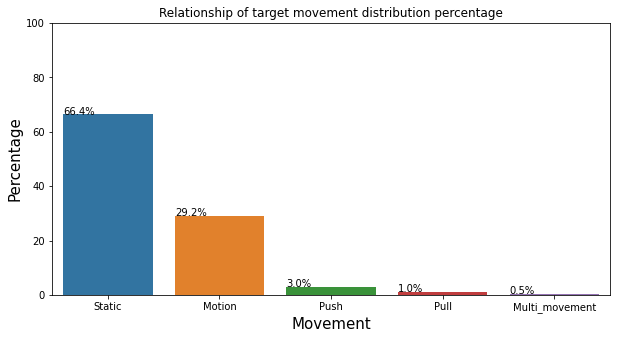

In [47]:
TARGET_percent=train_df['movement'].value_counts(normalize=True)*100
plt.rcParams['figure.figsize'] = [10, 5]
g=sns.barplot(x=TARGET_percent.index, y=TARGET_percent.values)
plt.title('Relationship of target movement distribution percentage')
for p in g.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)

plt.ylim(0,100)
plt.xlabel('Movement',size=15)
plt.ylabel('Percentage',size=15)
plt.show()

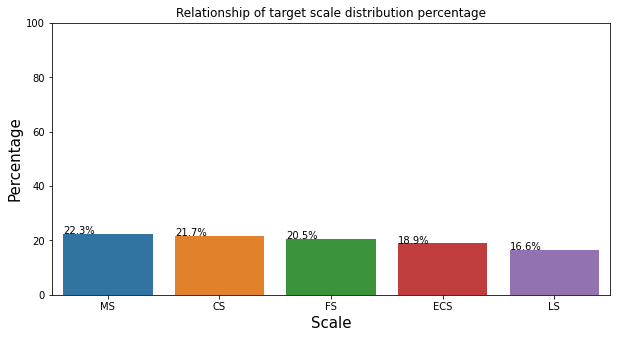

In [48]:
TARGET_percent=train_df['scale'].value_counts(normalize=True)*100
plt.rcParams['figure.figsize'] = [10, 5]
g=sns.barplot(x=TARGET_percent.index, y=TARGET_percent.values)
plt.title('Relationship of target scale distribution percentage')
for p in g.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)

plt.ylim(0,100)
plt.xlabel('Scale',size=15)
plt.ylabel('Percentage',size=15)
plt.show()

In [21]:
variables= ['lenght_frames','frames_per_second','duration']
categories={
    'train':train_df,
    'test':test_df,
    'validation':val_df
}
for category,df in categories.items():
    for variable in variables:
        print(f'Minimum {variable} in a Video on a {category} set: {df[variable].min()}')
        print(f'Maximum {variable} in a Video on a {category} set: {df[variable].max()}' )
        print(f'Average {variable} in a Video on a {category} set: {int(df[variable].mean())}' )
        print(f'Standard deviation {variable} in a Video on a {category} set: {int(df[variable].std())}')
        if variable == 'lenght_frames':
            print(f'Video with less than 8 frames on a {category} set: {df[df[variable] < 8][variable].size}')

        print('-'*30)
    print('#'*30)


Minimum lenght_frames in a Video on a train set: 4
Maximum lenght_frames in a Video on a train set: 962
Average lenght_frames in a Video on a train set: 38
Standard deviation lenght_frames in a Video on a train set: 32
Video with less than 8 frames on a train set: 4
------------------------------
Minimum frames_per_second in a Video on a train set: 14.985014985014985
Maximum frames_per_second in a Video on a train set: 60.0
Average frames_per_second in a Video on a train set: 24
Standard deviation frames_per_second in a Video on a train set: 2
------------------------------
Minimum duration in a Video on a train set: 0.13346666666666668
Maximum duration in a Video on a train set: 38.48
Average duration in a Video on a train set: 1
Standard deviation duration in a Video on a train set: 1
------------------------------
##############################
Minimum lenght_frames in a Video on a test set: 4
Maximum lenght_frames in a Video on a test set: 866
Average lenght_frames in a Video on a 

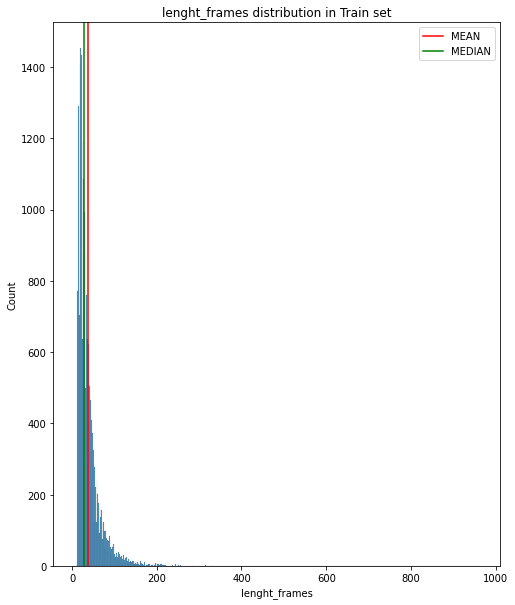

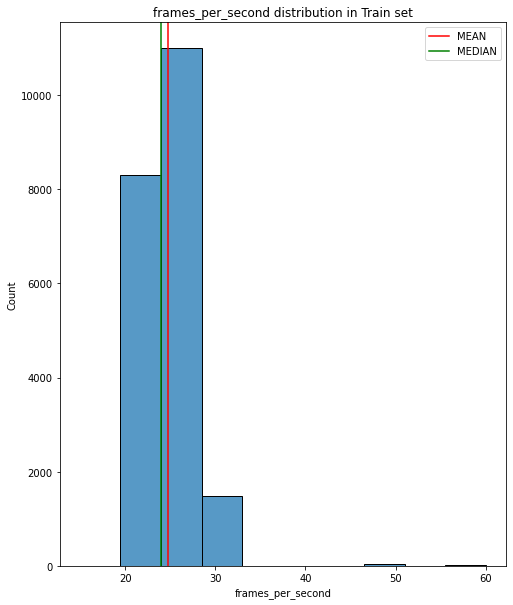

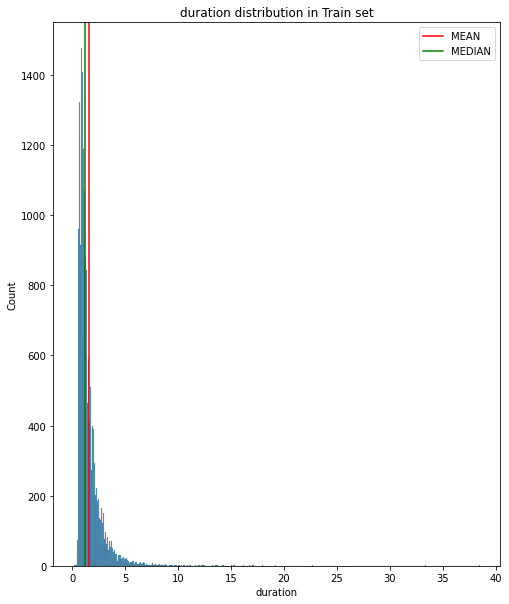

In [28]:
plt.rcParams['figure.figsize'] = [8, 10]
for variable in variables:
    if variable == 'frames_per_second':
        bins=10
    else:
        bins='auto'
    sns.histplot(data=train_df, x=variable,bins=bins)
    plt.axvline(train_df[variable].mean(),color='red', label="MEAN")
    plt.axvline(train_df[variable].median(),color='green', label="MEDIAN")
    plt.legend()
    plt.title(f"{variable} distribution in Train set")
    plt.show()


In [10]:
for label, _ in labels['scale'].items():
    print('Example', label)
    path = df[(df['scale'] == label) & (df['frames'] > 20)]['ubication'].iloc[0]
    print(path)
    ipd.display(Video(url=path, width=500))

Example ECS
../data/data_cleaned/train/tt3034594_shot_0038.mp4


Example FS
../data/data_cleaned/train/tt4092686_shot_0011.mp4


Example CS
../data/data_cleaned/train/tt2049448_shot_0035.mp4


Example MS
../data/data_cleaned/train/tt4466928_shot_0011.mp4


Example LS
../data/data_cleaned/train/tt2089723_shot_0030.mp4


In [12]:
for label, _ in labels['movement'].items():
    print('Example', label)
    path = df[(df['movement'] == label) & (df['frames'] > 20)]['ubication'].iloc[0]
    ipd.display(Video(url=path, width=500))

Example Static


Example Motion


Example Push


Example Pull


Example Multi_movement
